In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the dataset
data_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv"
df = pd.read_csv(data_url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1: Do smokers have higher insurance charges than non-smokers?

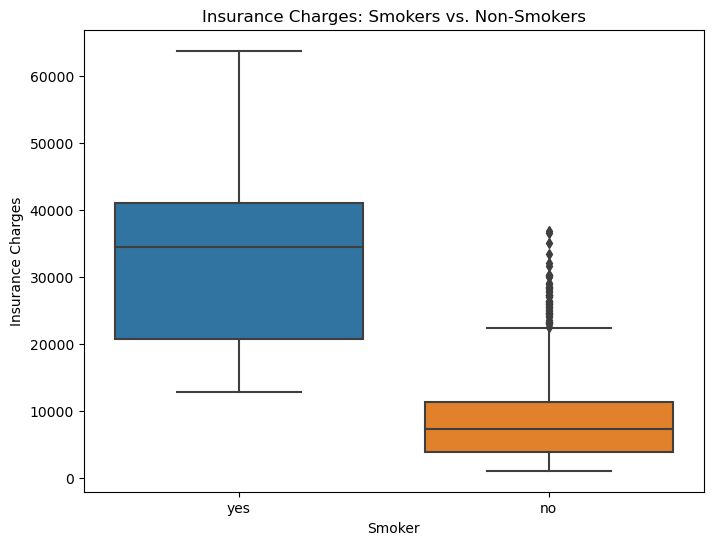

Reject the null hypothesis.
There is a significant difference in insurance charges between smokers and non-smokers.
p-value: 8.271435842179102e-283


In [2]:
smokers_charges = df[df['smoker'] == 'yes']['charges']
non_smokers_charges = df[df['smoker'] == 'no']['charges']

# Test assumptions
# Independence: Assuming the data is collected independently.
# Normality: Checking the distribution of charges in each group.
# Homogeneity of variances: Checking the equality of variances.

# Visualize the distributions using box plots
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df['smoker'], y=df['charges'], ax=ax)
ax.set_xlabel('Smoker')
ax.set_ylabel('Insurance Charges')
ax.set_title('Insurance Charges: Smokers vs. Non-Smokers')
plt.show()

# Perform independent t-test
t_statistic, p_value = ttest_ind(smokers_charges, non_smokers_charges)
alpha = 0.05

# Interpret the p-value and reject/fail to reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is a significant difference in insurance charges between smokers and non-smokers.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in insurance charges between smokers and non-smokers.")

print("p-value:", p_value)

# Q2: Are men more likely to smoke than women?
- **_Null Hypothesis (H0):_ The proportion of smokers is the same for both men and women.**

- **_Alternative Hypothesis (Ha):_ The proportion of smokers differs between men and women.**

Since we are comparing the proportions of smokers between two groups (men and women), and the data has two categories (smoker and non-smoker), we can use a chi-square test for independence.

Fail to reject the null hypothesis for males.
There is no significant difference in smoking habits among males.
p-value (males): 1.0
Fail to reject the null hypothesis for females.
There is no significant difference in smoking habits among females.
p-value (females): 1.0


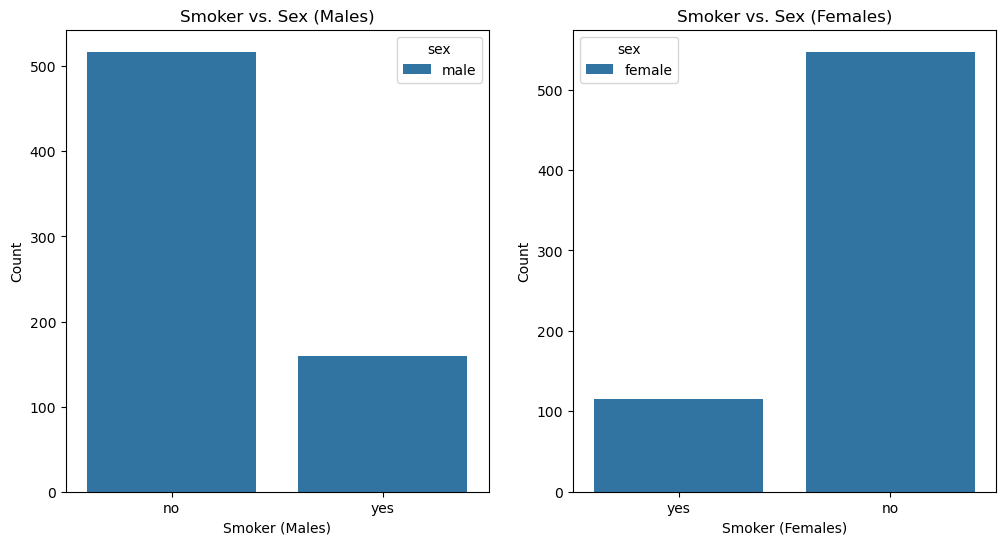

In [4]:
from scipy.stats import chi2_contingency

# Q2: Are men more likely to smoke than women?
males = df.loc[df['sex'] == 'male'].copy()
females = df.loc[df['sex'] == 'female'].copy()

# Create contingency table: smoker vs. sex for males
contingency_table_males = pd.crosstab(males['smoker'], males['sex'])

# Create contingency table: smoker vs. sex for females
contingency_table_females = pd.crosstab(females['smoker'], females['sex'])

# Perform chi-square test for males
chi2_males, p_value_males, dof_males, expected_males = chi2_contingency(contingency_table_males)

# Perform chi-square test for females
chi2_females, p_value_females, dof_females, expected_females = chi2_contingency(contingency_table_females)

alpha_chi2 = 0.05

# Interpret the p-values and reject/fail to reject the null hypothesis for males
if p_value_males < alpha_chi2:
    print("Reject the null hypothesis for males.")
    print("There is a significant difference in smoking habits among males.")
else:
    print("Fail to reject the null hypothesis for males.")
    print("There is no significant difference in smoking habits among males.")

print("p-value (males):", p_value_males)

# Interpret the p-values and reject/fail to reject the null hypothesis for females
if p_value_females < alpha_chi2:
    print("Reject the null hypothesis for females.")
    print("There is a significant difference in smoking habits among females.")
else:
    print("Fail to reject the null hypothesis for females.")
    print("There is no significant difference in smoking habits among females.")

print("p-value (females):", p_value_females)

# Visualize the distributions using bar plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x='smoker', hue='sex', data=males, ax=axes[0])
axes[0].set_xlabel('Smoker (Males)')
axes[0].set_ylabel('Count')
axes[0].set_title('Smoker vs. Sex (Males)')

sns.countplot(x='smoker', hue='sex', data=females, ax=axes[1])
axes[1].set_xlabel('Smoker (Females)')
axes[1].set_ylabel('Count')
axes[1].set_title('Smoker vs. Sex (Females)')

plt.show()

# Q3: Do different regions have different charges, on average?
- **Null Hypothesis (H0): The average charges are the same for all regions.**

- **Alternative Hypothesis (Ha): The average charges differ between at least two regions.** 

Since we are comparing the means of the charges for multiple groups (regions) and the data is independent, we can use a one-way ANOVA (Analysis of Variance) test.

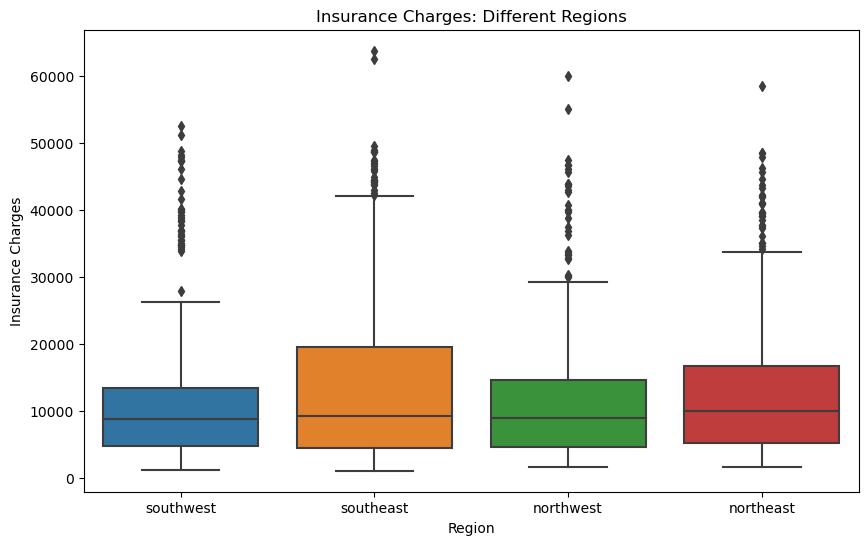

Reject the null hypothesis.
There is a significant difference in insurance charges among different regions.
p-value: 0.0308933560705201


In [5]:
# Visualize the distributions using box plots
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=df['region'], y=df['charges'], ax=ax)
ax.set_xlabel('Region')
ax.set_ylabel('Insurance Charges')
ax.set_title('Insurance Charges: Different Regions')
plt.show()

# Perform one-way ANOVA test
from scipy.stats import f_oneway

regions = df['region'].unique()
grouped_data = [df[df['region'] == r]['charges'] for r in regions]

f_statistic, p_value_anova = f_oneway(*grouped_data)

alpha_anova = 0.05

# Interpret the p-value and reject/fail to reject the null hypothesis
if p_value_anova < alpha_anova:
    print("Reject the null hypothesis.")
    print("There is a significant difference in insurance charges among different regions.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is no significant difference in insurance charges among different regions.")

print("p-value:", p_value_anova)